<a href="https://colab.research.google.com/github/manojfibby/CS460-Class-assignments/blob/main/LinearRegressionFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

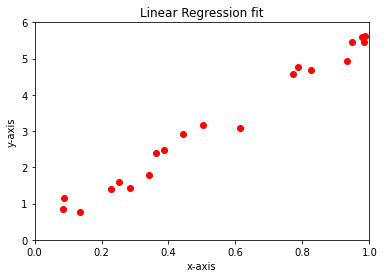

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Function to plot points
def pltPoints(x_s,y_s):

    x_max = int(max(x_s))
    x_max = (x_max+1)

    y_max = int(max(y_s)/2)
    y_max = (y_max+1)*2

    plt.plot(x_s,y_s, 'ro')
    plt.axis([0, x_max, 0, y_max])

    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('Linear Regression fit')

    plt.show()


m = 5 # slope initialized to 5

x_s = []
y_s = []

c_rng=np.random.default_rng()
x_rng=np.random.default_rng()

for i in range(20):
    
    c = c_rng.random() # Generating random value for c (y-intercept)
    x = x_rng.random() # Generating random value for x

    y=m*x+c 

    x_s.append(x)
    y_s.append(y)


pltPoints(x_s,y_s) #plotting the points


5.323460470144891 0.29146497312356034


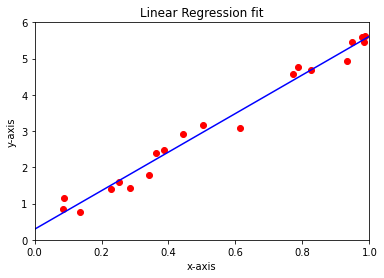

In [ ]:
#2nd_Assignment

from sklearn.linear_model import LinearRegression

def pltfit(x_s,y_s,m_fit,c_fit):

    x_max = int(max(x_s))#boundaries for x axis
    x_max = (x_max+1)

    y_max = int(max(y_s)/2)#boundaries for y axis 
    y_max = (y_max+1)*2

    plt.plot(x_s,y_s, 'ro')
    plt.axis([0, x_max, 0, y_max])

    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('Linear Regression fit')

    x = np.linspace(-5,5,100) #100 points between -5 to 5 taken and plotted
    y = m_fit*x+c_fit
    # print(x,y)
    plt.plot(x, y, '-b')

    plt.show()

x_snew = []

for i in x_s:
  x_snew.append([i]) #individual array entities inside the array 

X = np.array(x_snew) #all the X points extracted
Y = np.array(y_s) #all the Y points extracted
linreg = LinearRegression().fit(X,Y) #line fit 
mfit=linreg.coef_[0] #extracting slope of fit line
cfit=linreg.intercept_ #extracting intercept of fit line

print(mfit,cfit)
pltfit(x_s,y_s,mfit,cfit) #calling function for plot fitting   







The predicted slope and y_intercept values using batch gd are 5.321781127267555 0.29246022625781265
The mean squared error in case of batch gd is 0.0551116326131641


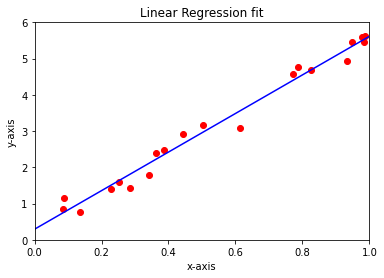

In [9]:
#3rd_Assignment

"""This function takes the dataset and mini batch size as input and outputs 
a list of mini batches
"""
def getbatches(dataset,sz):
    
  batches=[]
  batch = []
  for i in range(0,len(dataset)):  
    
    batch.append(dataset[i])

    if len(batch)==sz:
        batches.append(batch)
        batch=[]

  return batches

#This function calculates mnean square error given the dataset and the predicted line 
def mse(dataset,m,c):
  error = 0

  for i in range(0,len(dataset)):
    error = error + (dataset[i][1] - ( m*dataset[i][0] + c))*(dataset[i][1] - ( m*dataset[i][0] + c))


  error = error/len(dataset)
  return error

"""This function takes the dataset m(slope),c(y intercept)as input and 
calculates the errors in m(delta m) and c(delta c)
"""
def meanerr(dataset,m,c):

  merr=0 #error in m
  cerr=0 #error in c

  for i in range(0,len(dataset)):
    yp=m*dataset[i][0]+c                            #y predicted
    merr = merr-dataset[i][0]*((dataset[i][1]-yp))  # sigma xi*(y predicted-y actual)
    cerr = (cerr-(dataset[i][1]-yp))                # sigma y predicted-y actual

  merr = (2*merr)/len(dataset)
  cerr = (2*cerr)/len(dataset)

  return [merr,cerr]

"""The function takes dataset of points,number of epochs,learning rate, and 
batch size as input. It performs gradient descent and outputs the learnt m,c values. 
   
"""       
def grad_desc(dataset, epochs, lr, batchsz):
    
  m = 0
  c = 0
  
  batches = getbatches(dataset, batchsz)
  
  nbatches = len(batches) #calculates length of batches
  for i in range(0,epochs):
      
    ind = i%nbatches
    error = meanerr(batches[ind],m,c)

    m = m-lr*error[0]
    c = c-lr*error[1]
  
  return m,c

dataset = []
for i in range(0,len(x_s)):
  dataset.append([x_s[i],y_s[i]])

m_bgd,c_bgd = grad_desc(dataset, 1000, 0.05, 20) #batch size:20 implies batch gradient descent

print("The predicted slope and y_intercept values using batch gd are",m_bgd,c_bgd)
print("The mean squared error in case of batch gd is",mse(dataset,m_bgd,c_bgd))

pltfit(x_s,y_s,m_bgd,c_bgd)



The predicted slope and y_intercept values using mini batch gd are 5.331964525671319 0.29488227220116936
The mean squared error in case of minibatch gd is : 0.055183823300666304


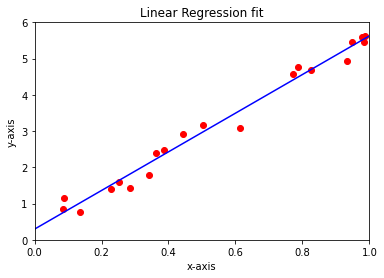

In [10]:
m_mbgd,c_mbgd = grad_desc(dataset, 1000, 0.05, 4) #batch size:4 implies mini batch gradient descent
print("The predicted slope and y_intercept values using mini batch gd are",m_mbgd,c_mbgd)
print("The mean squared error in case of minibatch gd is :",mse(dataset,m_mbgd,c_mbgd))
pltfit(x_s,y_s,m_mbgd,c_mbgd)


The predicted slope and y_intercept values using sgd are 5.344977407493598 0.3143403304358254
The mean squared error in case of sgd is  0.056358852595891594


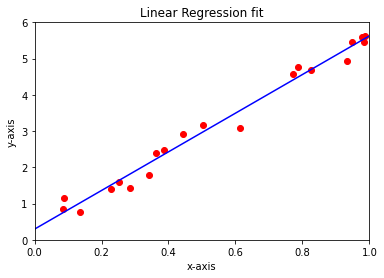

In [11]:
m_sgd,c_sgd = grad_desc(dataset, 1000, 0.05, 1) #batch size:1 implies Stochastic gradient Descent
print("The predicted slope and y_intercept values using sgd are",m_sgd,c_sgd)
print("The mean squared error in case of sgd is ", mse(dataset,m_sgd,c_sgd))
pltfit(x_s,y_s,m_mbgd,c_mbgd)